In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter
import os #this to change working directories
import pandas_profiling
from sklearn.base import clone
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#print(os.getcwd())
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import SGDClassifier


In [2]:
df1=pd.read_csv('./data/borrower_table.csv')
df2=pd.read_csv('./data/loan_table.csv')

In [3]:
df1.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [4]:
df2.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [5]:
df= pd.merge(df1,df2,on=['loan_id'], how='inner')

In [6]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [7]:
df.set_index(['loan_id'], inplace=True)

In [8]:
df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,,,,,,,,,,,,
289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [9]:
#Datacleaning
df["loan_repaid"].isnull().sum()

53446

In [10]:
df.dropna(subset=["loan_repaid"], inplace=True)

Positive examples = 30706
Negative examples = 16948
Proportion of positive to negative examples = 55.19%


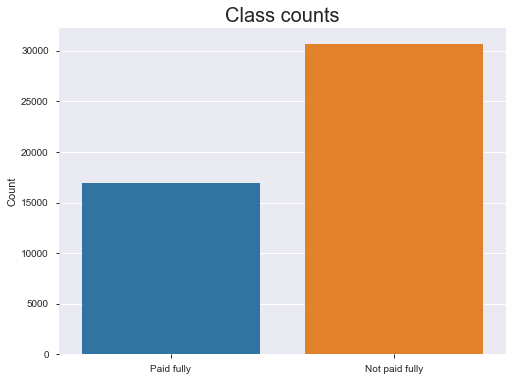

In [11]:
# Get number of positve and negative examples
pos = df[df["loan_repaid"] == 1].shape[0]
neg = df[df["loan_repaid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(neg/pos) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["loan_repaid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [12]:
#Drop Loan_granted and Date
df.drop(["loan_granted","date"], axis='columns', inplace=True)

In [13]:
#list of conditions(1=Other, 2=Emergency_funds, 3=Business, 4= Home, 5= Investment)
conditions = [
    (df['loan_purpose'] == "other"),
    (df['loan_purpose'] == "emergency_funds"),
    (df['loan_purpose'] == "business"),
    (df['loan_purpose'] == "home"),
    (df['loan_purpose'] == "investment"),
    ]

In [14]:
# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5]

In [15]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['loan_purpose'] = np.select(conditions, values)

In [16]:
#Fill NA
df['fully_repaid_previous_loans'] = df['fully_repaid_previous_loans'].fillna(0)
df['currently_repaying_other_loans'] = df['currently_repaying_other_loans'].fillna(0)
df['avg_percentage_credit_card_limit_used_last_year'] = df['avg_percentage_credit_card_limit_used_last_year'].fillna(0)


In [17]:
#Change to integers only
df.astype(int)
df.loan_repaid = df.loan_repaid.apply(int) # round instead of int is you prefer to round
df.fully_repaid_previous_loans = df.fully_repaid_previous_loans.apply(int) 
df.currently_repaying_other_loans = df.currently_repaying_other_loans.apply(int) 

df

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,loan_repaid
loan_id,,,,,,,,,,,,,
135565,1,0,0,6900,0.82,2085,3422,1,24500,38,8,1,1
423171,1,0,0,6100,0.53,6163,5298,1,29500,24,1,1,1
200139,1,0,0,4000,0.57,602,2757,1,31700,36,8,3,0
991294,0,1,0,7000,0.52,2575,2917,1,58900,33,3,2,1
875332,0,1,0,4300,0.83,722,892,1,5400,32,7,3,1
954215,1,0,0,7000,0.64,2113,5589,0,0,40,2,3,1
778076,1,0,0,4900,0.60,460,4297,1,26600,53,3,3,1
73441,0,1,0,3900,0.77,989,1547,1,45700,29,4,2,1
249377,1,0,0,5500,0.59,1154,2731,1,9300,51,2,3,1


In [18]:
df = df[["loan_repaid", "is_first_loan", "fully_repaid_previous_loans", "currently_repaying_other_loans", "total_credit_card_limit", "avg_percentage_credit_card_limit_used_last_year", "saving_amount" ,"checking_amount", "is_employed" ,"yearly_salary", "age", "dependent_number", "loan_purpose"]]

In [19]:
#Drop Loan_granted and Date?
#df.drop(["is_employed", "avg_percentage_credit_card_limit_used_last_year", "fully_repaid_previous_loans", "currently_repaying_other_loans"], axis='columns', inplace=True)
df.drop(["is_employed", "avg_percentage_credit_card_limit_used_last_year", "fully_repaid_previous_loans"], axis='columns', inplace=True)

C:\Users\halvo\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
df.head(2)

,loan_repaid,is_first_loan,currently_repaying_other_loans,total_credit_card_limit,saving_amount,checking_amount,yearly_salary,age,dependent_number,loan_purpose
loan_id,,,,,,,,,,
135565,1,1,0,6900,2085,3422,24500,38,8,1
423171,1,1,0,6100,6163,5298,29500,24,1,1


In [21]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,loan_repaid,6.172023
1,is_first_loan,2.458363
2,currently_repaying_other_loans,1.469210
3,total_credit_card_limit,6.458093
4,saving_amount,3.651614
5,checking_amount,4.599699
6,yearly_salary,4.836476
7,age,6.987127
8,dependent_number,2.789327


In [23]:
X.columns

Index(['loan_repaid', 'is_first_loan', 'currently_repaying_other_loans',
       'total_credit_card_limit', 'saving_amount', 'checking_amount',
       'yearly_salary', 'age', 'dependent_number'],
      dtype='object')

In [24]:
#Predictive machine learning model

In [25]:
X = df.copy(deep=True)

In [26]:
y = X.pop('loan_repaid')
count = y.count()
print(np.count_nonzero(y < 1))
print(np.count_nonzero(y >= 1))

16948
30706


In [27]:
ss= StandardScaler()
X= ss.fit_transform(X)


Text(0.5, 1, 'Heatmap of correlation')

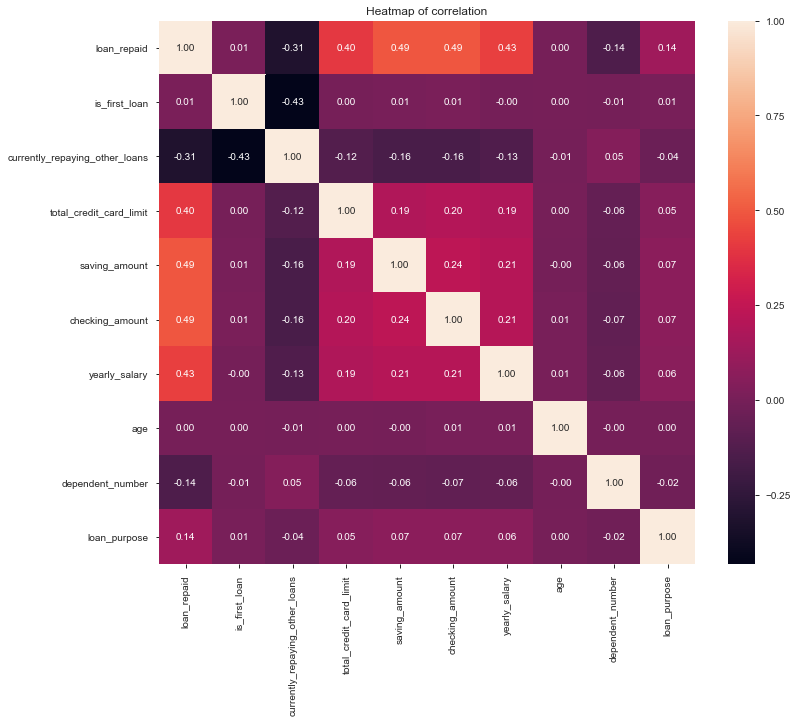

In [28]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat=sns.heatmap(data=corr, annot=True, fmt=".2f")
plt.title('Heatmap of correlation')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size = .20)

In [30]:
count = y_train.count()
print(np.count_nonzero(y_train < 1))
print(np.count_nonzero(y_train >= 1))

13513
24610


In [31]:
#SMOTE resmapling
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print('smote target shape %s' % Counter(y_resampled))

smote target shape Counter({0: 24610, 1: 24610})


In [32]:
X_resampled, X_val, y_resampled, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42)

# CREATE THE MODEL

In [36]:
model = SGDClassifier(random_state=42).fit(X_resampled, y_resampled)
y_pred= model.predict(X_val)
print("Accurcay",accuracy_score(y_val, y_pred))
print("Precision", precision_score(y_val, y_pred))
print("Recall",recall_score(y_val, y_pred))
print("F1 score",f1_score(y_val, y_pred))

Accurcay 0.9038602194229988
Precision 0.9246018298881735
Recall 0.8808716707021792
F1 score 0.9022071587997025


# Tuning the hyperparameters

In [38]:
scorers = {
    'accuracy_score': make_scorer(accuracy_score)
}

In [40]:
model =  SGDClassifier()


In [54]:
param_dict={"loss": ["hinge", "modified_huber", "log", "squared_hinge", "perceptron"],
            "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            "penalty": ["none", "l1", "l2", "elasticnet"]
           }


In [55]:
grid=GridSearchCV(model, 
                 param_grid=param_dict,
                 cv=10,
                 verbose=1,
                 n_jobs=-1)
grid.fit(X_resampled,y_resampled)


Fitting 10 folds for each of 140 candidates, totalling 1400 fits


GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'modified_huber', 'log',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet']},
             verbose=1)

In [56]:
grid.best_params_

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}

In [57]:
grid.best_estimator_

SGDClassifier(alpha=0.01, penalty='l1')

In [58]:
grid.best_score_

0.9050792360828931

In [48]:
df2 = pd.DataFrame(grid.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.219592,0.031802,0.070666,0.065279,0.0001,hinge,none,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.894961,0.898009,0.906745,0.896180,0.895774,0.906948,0.906745,0.904104,0.905933,0.903495,0.901889,0.004792,24
1,0.280619,0.042924,0.002001,0.001007,0.0001,hinge,l1,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.897399,0.900244,0.911824,0.894555,0.893133,0.907152,0.906948,0.905120,0.906948,0.902885,0.902621,0.005805,19
2,0.286841,0.046614,0.002997,0.004018,0.0001,hinge,l2,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.895165,0.897806,0.910605,0.898618,0.896587,0.908371,0.905526,0.905120,0.905526,0.906542,0.902987,0.005150,11
3,0.656092,0.074039,0.002194,0.001323,0.0001,modified_huber,none,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.896790,0.898822,0.909183,0.893133,0.888866,0.905526,0.907558,0.907152,0.905120,0.894758,0.900691,0.006744,30
4,0.589568,0.054081,0.001747,0.000401,0.0001,modified_huber,l1,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.895977,0.898212,0.900650,0.890695,0.894758,0.903698,0.905729,0.901260,0.901869,0.899025,0.899187,0.004240,31
5,0.535594,0.050821,0.001863,0.000295,0.0001,modified_huber,l2,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.898822,0.897603,0.901463,0.890695,0.893539,0.904104,0.899431,0.891914,0.908371,0.899228,0.898517,0.005185,34
6,0.240929,0.041245,0.001805,0.000331,0.0001,log,none,"{'alpha': 0.0001, 'loss': 'log', 'penalty': 'n...",0.899025,0.897196,0.908167,0.897196,0.893133,0.906745,0.905729,0.903088,0.907152,0.899634,0.901707,0.004905,26
7,0.260310,0.019912,0.001799,0.000401,0.0001,log,l1,"{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}",0.895977,0.897196,0.905526,0.895977,0.892523,0.904510,0.906542,0.904510,0.907558,0.904510,0.901483,0.005154,27
8,0.230102,0.021700,0.001363,0.000848,0.0001,log,l2,"{'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}",0.895774,0.897399,0.908777,0.898822,0.892117,0.906339,0.905323,0.902682,0.906339,0.903698,0.901727,0.005147,25
9,0.134029,0.007589,0.002307,0.002540,0.001,hinge,none,"{'alpha': 0.001, 'loss': 'hinge', 'penalty': '...",0.898822,0.900041,0.908574,0.895571,0.894758,0.908371,0.905120,0.906542,0.908167,0.906136,0.903210,0.005122,8


In [37]:
model = SGDClassifier(loss="hinge", alpha=0.01, penalty='l1', random_state=42)
clf= model.fit(X_resampled, y_resampled)

In [38]:
print("Accuracy on training set: {:.3f}".format(model.score(X_resampled,y_resampled)))

Accuracy on training set: 0.904


# Validation DATA

In [40]:
y_pred= model.predict(X_val)

In [42]:
print("Accurcay",accuracy_score(y_val, y_pred))
print("Precision", precision_score(y_val, y_pred))
print("Recall",recall_score(y_val, y_pred))
print("F1 score",f1_score(y_val, y_pred))

Accurcay 0.9062982527427875
Precision 0.9398115840893231
Recall 0.8695722356739306
F1 score 0.9033285822084346


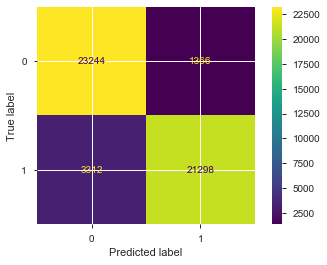

In [70]:
plot_confusion_matrix(model, X_resampled, y_resampled)

# Testdata with tuning

In [ ]:
model = SGDClassifier(loss="hinge", alpha=0.01, penalty='l1', random_state=42)
clf= model.fit(X_resampled, y_resampled)

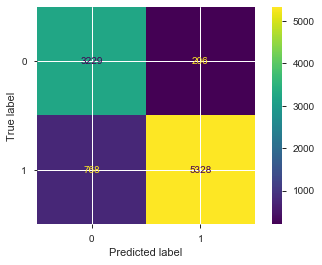

In [71]:
plot_confusion_matrix(model, X_test, y_test)

In [72]:
# predict the test data
y_pred= model.predict(X_test)

In [73]:
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))


Accurcay 0.8978071555975239
Precision 0.9627755692085291
Recall 0.8740157480314961
F1 score 0.9162510748065348
